In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('ex2data2.txt', header=None)

In [5]:
X = df[[0, 1]].values
y = df[[2]].values

In [6]:
pos_label, neg_label = (y==1).flatten(), (y==0).flatten()

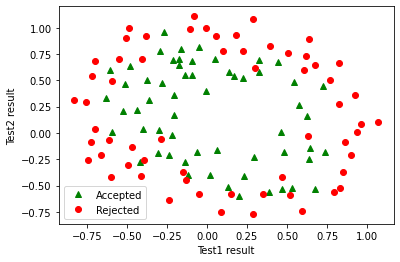

In [7]:
plt.plot(X[pos_label, 0], X[pos_label, 1], 'g^', label='Accepted')
plt.plot(X[neg_label, 0], X[neg_label, 1], 'ro', label='Rejected')
plt.xlabel('Test1 result')
plt.ylabel('Test2 result')
plt.legend()
plt.show()

In [8]:
# def featureMap(x1, x2, degree):
#     result = np.ones((x1.shape[0], 1))
#     for i in range(0, degree + 1):
#         for j in range(0, degree-i+1):
#             result = np.hstack((result, (x1**i) * (x2**j)))
#     return result[:, 1:]

def mapFeature(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(len(x1)).reshape(len(x1),1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j).reshape(len(x1),1)
#             print("X^{} * X^{}".format(i, j))
            out= np.hstack((out,terms))
    return out

In [9]:
Xbar = mapFeature(X[:, 0], X[:, 1], 6)
Xbar

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

In [10]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [11]:
# def compute_cost(theta, X, y, Lambda):
#     m = X.shape[0]
#     cost = -1/m * np.sum((y * np.log(sigmoid(X @ theta)) + (1 - y)*np.log(1 - sigmoid(X @theta))))
#     regCost = cost + Lambda/(2*m) * np.sum(theta ** 2)
#     return regCost
def costFunctionReg(theta, X, y, Lambda):
    m = len(y)
    predictions = sigmoid(X @ theta)
    err = (-y * np.log(predictions)) - ((1-y) * np.log(1 - predictions))
    cost = 1/m * sum(err)
    
    # Compute Gradient
    new_theta_descent = 1/m * (X.T @ (predictions - y))
    descent_0 = new_theta_descent[0].reshape((1, 1))
    descent_j = new_theta_descent[1:, :].reshape((-1, 1)) + (Lambda/m) * theta[1:].reshape((-1, 1))
    grad = np.vstack((descent_0, descent_j))
    return cost[0], grad

In [12]:
# init_theta = np.ones((Xbar.shape[1], 1))
# compute_cost(init_theta, Xbar, y, 10)
initial_theta = np.zeros((len(Xbar[0]), 1))
Lambda = 1
cost, grad=costFunctionReg(initial_theta, Xbar, y, Lambda)
cost

0.6931471805599461

In [14]:
# def grad_descent(theta, X, y, learning_rate, iters, Lambda):
#     m = len(X)
#     theta_history = [init_theta]
#     J_history = [compute_cost(theta, X, y, Lambda)]
#     for i in range(iters):
#         descent = 1/m * X.T @ (sigmoid(X @ theta) - y) + Lambda/m * theta_history[-1]
#         theta = theta_history[-1] - learning_rate * descent
#         theta_history.append(theta)
#         J_history.append(compute_cost(theta, X, y, Lambda))
#     return theta_history[-1], J_history
def grad_descent(theta, X, y, learning_rate, iters, Lambda):
    m = len(y)
    J_history = []
    for i in range(iters):
        cost, descent = costFunctionReg(theta, X, y, Lambda)
        theta = theta - learning_rate * descent
        J_history.append(cost)
    return theta, J_history

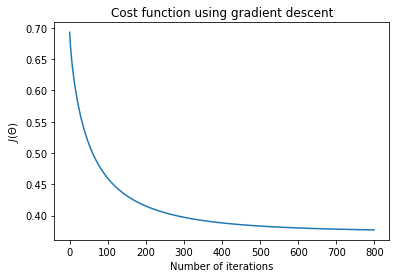

array([[ 2.25319932],
       [ 1.44552306],
       [ 2.33283911],
       [-3.57008233],
       [-2.35002884],
       [-3.07090829],
       [ 0.50119267],
       [-0.88407626],
       [-0.69606495],
       [-0.22204243],
       [-2.69560917],
       [ 0.04161168],
       [-1.31573798],
       [-0.80286232],
       [-2.23101395],
       [-0.39638083],
       [-0.43758167],
       [ 0.09476652],
       [-0.69300577],
       [-0.78996079],
       [-0.45416815],
       [-2.01051679],
       [ 0.16446857],
       [-0.59855483],
       [ 0.11471778],
       [-0.73960173],
       [-0.52044034],
       [-1.38532427]])

In [15]:
# result_theta, J_history = grad_descent(init_theta, Xbar, y, 1, 100, 10)
result_theta, J_history = grad_descent(initial_theta, Xbar, y, 1, 800, 0.2)
plt.plot(J_history)
plt.xlabel('Number of iterations')
plt.ylabel('$J(\Theta)$')
plt.title('Cost function using gradient descent')
plt.show()
result_theta

array([[-1.        , -0.94897959, -0.89795918, -0.84693878, -0.79591837,
        -0.74489796, -0.69387755, -0.64285714, -0.59183673, -0.54081633,
        -0.48979592, -0.43877551, -0.3877551 , -0.33673469, -0.28571429,
        -0.23469388, -0.18367347, -0.13265306, -0.08163265, -0.03061224,
         0.02040816,  0.07142857,  0.12244898,  0.17346939,  0.2244898 ,
         0.2755102 ,  0.32653061,  0.37755102,  0.42857143,  0.47959184,
         0.53061224,  0.58163265,  0.63265306,  0.68367347,  0.73469388,
         0.78571429,  0.83673469,  0.8877551 ,  0.93877551,  0.98979592,
         1.04081633,  1.09183673,  1.14285714,  1.19387755,  1.24489796,
         1.29591837,  1.34693878,  1.39795918,  1.44897959,  1.5       ],
       [-1.        , -0.94897959, -0.89795918, -0.84693878, -0.79591837,
        -0.74489796, -0.69387755, -0.64285714, -0.59183673, -0.54081633,
        -0.48979592, -0.43877551, -0.3877551 , -0.33673469, -0.28571429,
        -0.23469388, -0.18367347, -0.13265306, -0.

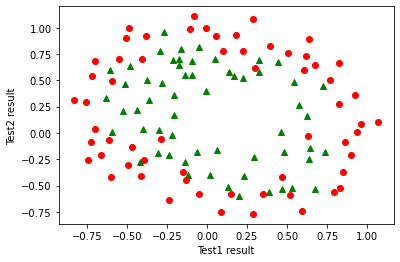

In [49]:


def mapFeaturePlot(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out
plt.plot(X[pos_label, 0], X[pos_label, 1], 'g^', label='Accepted')
plt.plot(X[neg_label, 0], X[neg_label, 1], 'ro', label='Rejected')
plt.xlabel('Test1 result')
plt.ylabel('Test2 result')
# Plotting decision boundary
u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
u, v = np.meshgrid(u_vals, v_vals)

### Using Lasso Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(penalty='l1', solver='saga')
clf.fit(Xbar, y)
result_theta_lasso = clf.coef_.reshape(-1, 1)


In [ ]:
u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ result_theta_lasso
plt.contour(u_vals,v_vals,z.T,0)
plt.legend()
plt.show()